In [1]:
import cv2
import os
import numpy as np
import matplotlib.pyplot as plt
from scipy import ndimage, misc
from PIL import Image
from google.colab.patches import cv2_imshow

In [2]:
for root, dirs, files in os.walk("./data", topdown=False):
   for name in files:
      print(os.path.join(root, name))
   for name in dirs:
      print(os.path.join(root, name))

data_path = "./drive/MyDrive/University Academics/Year 4 EngSci/CSC413 Project/trainA"

In [26]:
########################################################
# PART 1 - Median Filtering
########################################################
def median_filter(image_path):
  img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE) # Load image
  img_median = cv2.medianBlur(img, 25) # Add median filter to image
  result = np.minimum(img.astype(np.uint16)+(255-img_median.astype(np.uint16)), 255)
  return result.astype(np.uint8)

In [29]:
########################################################
# PART 2 - Edge Detection, Dilation Erosion
########################################################
def edge_dilation_erosion_filter(image_path):
  img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE) # Load image
  edges = cv2.Canny(img,100,200)
  dilated = cv2.dilate(edges, np.ones((3,3),np.uint8), iterations=1)
  eroded = cv2.erode(dilated, np.ones((4,4),np.uint8), iterations=1)
  return cv2.bitwise_not(eroded)

In [5]:
########################################################
# PART 3 - Adaptive Filter
########################################################
def adaptive_filter(image_path):
  img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE) # Load image
  return cv2.adaptiveThreshold(img,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,\
            cv2.THRESH_BINARY,15,20)


In [31]:
if not os.path.exists(data_path+"/median_filtered"):
  os.mkdir(data_path+"/median_filtered")
if not os.path.exists(data_path+"/edge_dilation_erosion"):
  os.mkdir(data_path+"/edge_dilation_erosion")
if not os.path.exists(data_path+"/adaptive_filtered"):
  os.mkdir(data_path+"/adaptive_filtered")

for img in sorted(os.listdir(data_path)):
  if img.endswith('.png'):
    print(os.path.join(data_path,img))
    cv2.imwrite(os.path.join(data_path+"/median_filtered",img),median_filter(os.path.join(data_path,img)))
    cv2.imwrite(os.path.join(data_path+"/edge_dilation_erosion",img),edge_dilation_erosion_filter(os.path.join(data_path,img)))
    cv2.imwrite(os.path.join(data_path+"/adaptive_filtered",img),adaptive_filter(os.path.join(data_path,img)))


./drive/MyDrive/University Academics/Year 4 EngSci/CSC413 Project/trainA/img_0000.png
./drive/MyDrive/University Academics/Year 4 EngSci/CSC413 Project/trainA/img_0001.png
./drive/MyDrive/University Academics/Year 4 EngSci/CSC413 Project/trainA/img_0002.png
./drive/MyDrive/University Academics/Year 4 EngSci/CSC413 Project/trainA/img_0003.png
./drive/MyDrive/University Academics/Year 4 EngSci/CSC413 Project/trainA/img_0004.png
./drive/MyDrive/University Academics/Year 4 EngSci/CSC413 Project/trainA/img_0005.png
./drive/MyDrive/University Academics/Year 4 EngSci/CSC413 Project/trainA/img_0006.png
./drive/MyDrive/University Academics/Year 4 EngSci/CSC413 Project/trainA/img_0007.png
./drive/MyDrive/University Academics/Year 4 EngSci/CSC413 Project/trainA/img_0008.png
./drive/MyDrive/University Academics/Year 4 EngSci/CSC413 Project/trainA/img_0009.png
./drive/MyDrive/University Academics/Year 4 EngSci/CSC413 Project/trainA/img_0010.png
./drive/MyDrive/University Academics/Year 4 EngSci/CSC

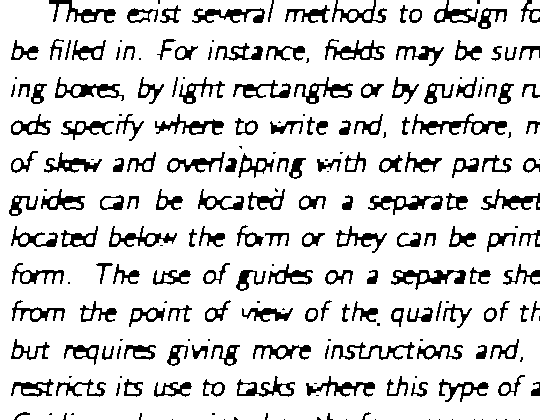

True

In [30]:
result = edge_dilation_erosion_filter("./drive/MyDrive/University Academics/Year 4 EngSci/CSC413 Project/trainA/img_0000.png")
cv2_imshow(result)
cv2.imwrite(os.path.join(data_path+"/median_filtered","img_0000.png"),result)